# CNN with PyTorch 2

# Fashion-MNIST Classification

Classification using Convolutional Neural Network with PyTorch


## The Setup

## PyTorch Modules

In [1]:
#!pip install torch
#!pip install torchvision


from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)


## Additional modules

In [2]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

## Helper Function to Show an Image

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

## Download, Transform and Create Dataset Objects for Training and Validation

In [4]:
# Resizing images from 28 x 28 and transforming to tensor

IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [6]:
# Creating the training and validation sets; checking the shape

dataset_train = dsets.FashionMNIST(root = "./data", train = True, download = True, transform = composed)
dataset_val = dsets.FashionMNIST(root = "./data", train = False, download = True, transform = composed)
print('Training:', dataset_train[0][0].shape)
print('Validation:',dataset_val[0][0].shape)

Training: torch.Size([1, 16, 16])
Validation: torch.Size([1, 16, 16])


## Check some images

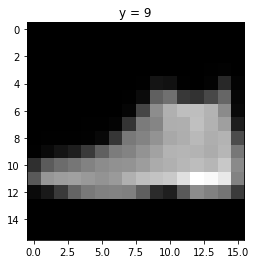

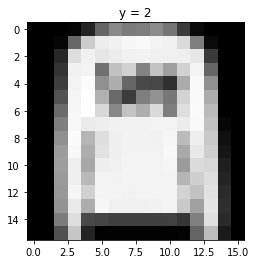

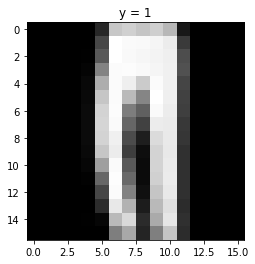

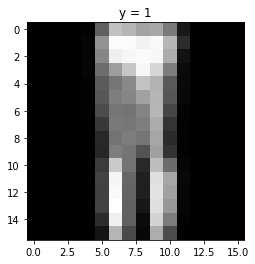

In [7]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==3:
        break 

## Create a Convolutional Neural Network

In [9]:
# Constructor using Batch Norm

class CNN_batch(nn.Module):

    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
   
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

# Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

## Create a train loader and validation loader

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )

test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

## Create a Convolutional Neural Network object

In [12]:
# model = CNN_batch(out_1=16, out_2=32,number_of_classes=10)

model = CNN_batch()

## Create the objects for the criterion and optimizer

Using CrossEntropyLoss, SGD and a learning rate of 0.1


In [13]:
model.parameters()

<generator object Module.parameters at 0x0000026B5BEAAEC8>

In [14]:
list(model.parameters())

[Parameter containing:
 tensor([[[[-0.0015,  0.1073, -0.1646, -0.1472, -0.0770],
           [ 0.0536, -0.0040,  0.1586, -0.0177,  0.0529],
           [-0.0604, -0.0393, -0.1911, -0.1325, -0.0824],
           [ 0.0074,  0.0791,  0.1200, -0.1356, -0.0871],
           [ 0.0726,  0.1661, -0.0412,  0.1497, -0.0322]]],
 
 
         [[[ 0.0212,  0.1811, -0.1855, -0.1259, -0.0506],
           [-0.0780,  0.1728, -0.1296, -0.0921, -0.1397],
           [-0.1873, -0.1167,  0.1719,  0.0892,  0.0969],
           [ 0.0105, -0.1025,  0.0338, -0.1867, -0.1445],
           [-0.1031,  0.1262,  0.1173, -0.0887, -0.0072]]],
 
 
         [[[ 0.1279,  0.1988,  0.0794,  0.0270,  0.1341],
           [-0.1178,  0.0373, -0.1551, -0.1386, -0.1033],
           [ 0.0905,  0.0804, -0.1185,  0.0604,  0.1098],
           [-0.0252,  0.0076,  0.0463,  0.1241,  0.1920],
           [-0.1541, -0.0733,  0.0786,  0.1657,  0.1740]]],
 
 
         [[[ 0.1765,  0.0398, -0.1739,  0.0184, -0.1251],
           [-0.1864,  0.1777,  

In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

criterion = nn.CrossEntropyLoss()

## Training the Model

In [16]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

## Plotting the accuracy and cost for each epoch of the trainig and testing data

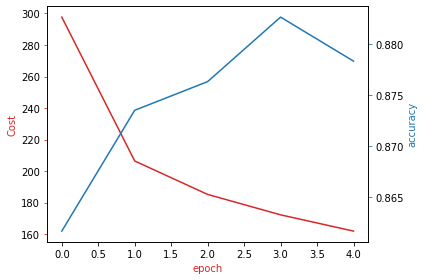

In [17]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

dataset: https://github.com/zalandoresearch/fashion-mnist

This notebook is an adaptation of IBM/Coursera Deep Neural Networks with PyTorch Honors Project, part of the IBM AI Engineering Professional Certificate
https://www.coursera.org/